# In-Class Quiz Nº 1

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Ruben Santos
## Number:  49063

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q1.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: $\texttt{breast_cancer}$ dataset of $\texttt{sklearn}$
### Consider the $\texttt{breast_cancer}$ dataset of $\texttt{sklearn}$, divided into two sub-sets, training/testing, according to the commands in the next cell.
* ### X1: training data ($400\times30$ array)
* ### y1: classes of the training data
* ### X2: test data (array de $169\times30$)
* ### y2: classes of the test data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D=DT.load_breast_cancer()
X=D.data
y=D.target

################################################################
#Consider malignant cases as positive (class 1)
# Need to invert classes: malagne 1, benign 0
y=np.abs(y-1)
################################################################

#division int training and test sub-sets
X1,X2,y1,y2=train_test_split(X,y,test_size=169,stratify=y,random_state=42)

# Question 1: Logistic Discriminants
##  Consider a logistic discriminant with the following parameters $\texttt{C=2}$, $\texttt{solver='saga'}$, $\texttt{penalty='l1'}$ and $\texttt{max_iter=5000}$. Train the classifier with the training set.
### a) Print the total number of errors and the confusion matrix  (non-normalized) of this classifier for the test set.
### b) Calibrate this classifier in order to have a maximum number of false negatives in the test less than or equal to 5, while keeping the total number of errors below 15.¶
### c) Plot the ROC curve of this classifier with the test data. Include in this plot the operational point of the classifiers in items 1.a) and 1.b).

## 1.a)

In [16]:
logisticRegr = LogisticRegression(C=2, solver="saga", penalty="l1", max_iter=500).fit(X1, y1)
predictions = logisticRegr.predict(X2)
score = logisticRegr.score(X2, y2)
print("score=", score)

cm = confusion_matrix(y2, predictions)
print("Matriz:\n",cm)


score= 0.9053254437869822
Matriz:
 [[104   2]
 [ 14  49]]


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


## 1.b)

In [33]:

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

sgd=SGDClassifier().fit(X1,y1)
ytest_score=sgd.decision_function(X2)
ytest_p=sgd.predict(X2)

## 1.c)

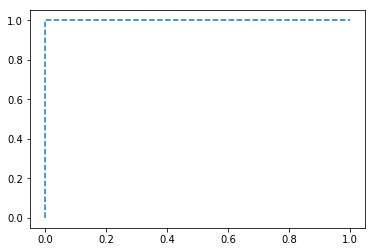

In [36]:
fpr,rec,thresh=roc_curve(ytest_p, ytest_score)
plt.plot(fpr, rec, linestyle="--")


<hr style="border:2px solid black"> </hr>

# Question 2 - SVMs:
## Consider a $\texttt{SVC}$ classifier with the following parameters: $\texttt{kernel='rbf'}$ and $\texttt{C=2}$.
### a) Preprocess the data using the function  $\texttt{StandardScaler}$. Train this function with the training data and apply the transformation to the training and test sets. Use the pre-processed data in the following items.
### b) Train the $\texttt{SVC}$ classifier with the training data and plot the ROC curve of this classifier with the test data. Include in this plot the operating point of the classifier.
### c)  Calibrate the classifier from the previous section to obtain one (1) false negative in the test data. After calibration, what is the minimum number of false positives obtained in the test set?¶

## 2.a)

In [23]:
from sklearn.svm import LinearSVC
import sklearn.preprocessing as pp

model=SVC(kernel="rbf", C=2)

sc=pp.StandardScaler().fit(X1)
X1_S=sc.transform(X1)


## 2.b)

In [37]:
model.fit(X1, y1)

sgd=SGDClassifier().fit(X1,y1)
ytest_score=sgd.decision_function(X2)
ytest_p=sgd.predict(X2)

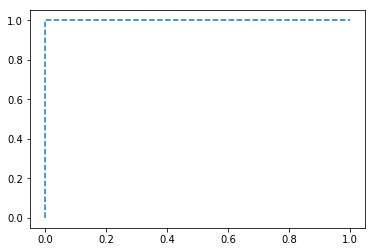

In [38]:
fpr,rec,thresh=roc_curve(ytest_p, ytest_score)
plt.plot(fpr, rec, linestyle="--")


## 2.c)